## Linear Regression w/ sklearn

### Cybersecurity Regression Datasets

This repository provides two synthetic datasets designed for regression modeling tasks in the cybersecurity domain. Each dataset includes **1,000 samples** with clearly defined data-generating processes and added Gaussian noise.

<!-- 1000개의 데이터가 있다고 한다.-->
---

### Dataset A: Single Feature

**File:** `cyber_risk_1feature.csv`

- **Feature:**
  - `failed_login_attempts` (integer)  
    Number of failed login attempts within the last 24 hours.  
    Sampled from a Poisson distribution (λ = 2), truncated at [0, 20].
<!-- 지난 24시간 이내에 실패한 로그인 횟수를 기록하고-->
<!-- 포아송 분호는 2, 0,20사이로 구성됨. -->
- **Target (risk_score):**  
  Defined by the true linear model:

  \[
  \text{risk\_score} = 5 + 3 \cdot \text{failed\_login\_attempts} + \varepsilon, 
  \quad \varepsilon \sim \mathcal{N}(0, 2^2)
  \]

  Values are clipped to the range [0, 100] to simulate realistic risk scoring.
<!-- 선형 모델을 통해서 제작한 것 같다.-->
---

### Dataset B: Three Features

**File:** `cyber_risk_3features.csv`

- **Features:**
  - `failed_login_attempts` (integer): Same distribution as in Dataset A (Poisson λ = 2, truncated at [0, 20]).  
  - `password_age_days` (float): Days since the last password change, sampled from a Uniform(0, 365).  
  - `phishing_click_rate` (float): Simulated proportion of phishing links clicked, drawn from a Beta(2, 8) distribution.

- **Target (risk_score):**  
  Defined by the following regression model with an interaction term:

  \[
  \text{risk\_score} = 10 + 2.5x_1 + 0.02x_2 + 20x_3 + 0.5(x_1 \cdot x_3) + \varepsilon,
  \quad \varepsilon \sim \mathcal{N}(0, 3^2)
  \]

  where \(x_1 =\) failed login attempts, \(x_2 =\) password age in days, and \(x_3 =\) phishing click rate.  
  Values are clipped to [0, 100].

---


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 불러오기
path = "./data/cyber_risk_1feature.csv"
df = pd.read_csv(path)

feature_cols = ["failed_login_attempts"]
target_col = "risk_score"

# Feature와 Target 분리
X = df[feature_cols].values
y = df[target_col].values

# 1. Train-Test Split (예: 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2 , random_state=42 
)

In [4]:
# 2. Linear Regression 학습
model = LinearRegression()
model.fit(X_train, y_train)

# model = LinearRegression() 으로 설정하고
# model.fit(X_train, y_train) 을 통해서 model을 학습시킨다.

LinearRegression()

In [ ]:
# 3. Train MSE 측정
y_train_pred = model.predict(X_train)
# y_train_pred 이란?
# LinearRegression model을 통해서 X_train, 즉 인풋으로 예측한 값이다.
train_mse = mean_squared_error(y_train, y_train_pred)

# 우리가 좋은 모델을 만든다는 것은 MSE가 최소가 되는 것을 원하는 것이고, 이게 바로
# 수직이라는 것!
# train_mse를 통해서 뭐 암튼 구해준다.

# 4. Test MSE 측정
y_test_pred = model.predict(X_test)
# test의 MSE도 똑같이 구해본다.
test_mse = mean_squared_error(y_test, y_test_pred)

# 결과 출력
print("=== Linear Regression 결과 ===")
print("계수 (beta):", model.coef_)
print("절편 (intercept):", model.intercept_)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# 둘이 비슷하게 나온 것을 보아 괜찮은 듯..?
# 다만, test도 아 큰 상관은 없겠구나

=== Linear Regression 결과 ===
계수 (beta): [2.98974413]
절편 (intercept): 5.048440487988662
Train MSE: 3.8772762306776873
Test MSE: 3.9124858635397057


### Question. Why don't we use train-validation split?

In [8]:
# 왜 우리는 학습 검증 분할을 하지 않는가?
# Train validation split(학습-검증 분할)은 머신러닝에서 모델의 과적합을 방지하고
#  일반화 성능을 평가하기 위해 전체 데이터셋을 학습(train), 검증(validation), 테스트(test) 
# 세 가지 데이터로 분할하는 과정

# 데이터가 이미 선형으로 해서 만든건데 굳이?

### Visualization

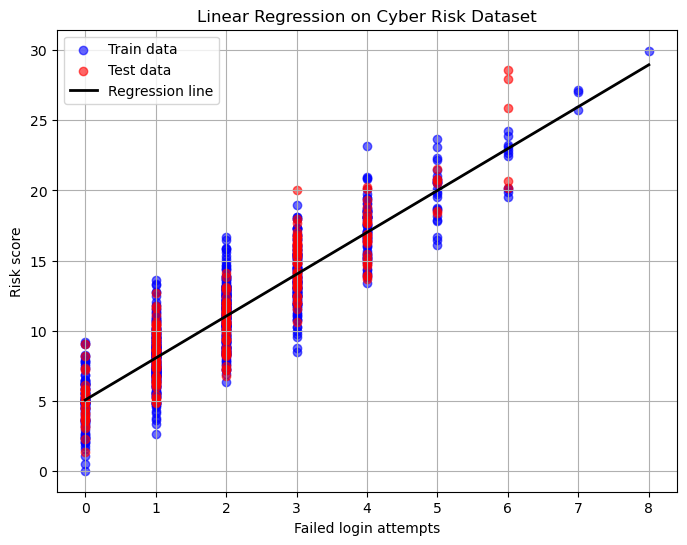

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# ----- 산점도 & 회귀선 그리기 -----

plt.figure(figsize=(8,6))

# 전체 데이터 산점도
plt.scatter(X_train, y_train, color="blue", alpha=0.6, label="Train data")
plt.scatter(X_test, y_test, color="red", alpha=0.6, label="Test data")

# 회귀선 그리기 (예측값은 sklearn 모델과 normal equation이 동일)
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_pred_line = model.predict(x_range)

plt.plot(x_range, y_pred_line, color="black", linewidth=2, label="Regression line")

# Plot 설정
plt.xlabel("Failed login attempts")
plt.ylabel("Risk score")
plt.title("Linear Regression on Cyber Risk Dataset")
plt.legend()
plt.grid(True)
plt.show()

## Linear Regression w/o sklearn

In [ ]:
# 우리가 학습한 방법 그대로 해보는 시간이다.
# 나의 목표는 코드로 선형회귀 해줘! 이게 아니라
# 내가 해당 식을 파이썬으로 구현할 줄 알아야하는 것!
# 한 번 생각해보고 보면 더 좋을 것 같다.

In [35]:
import numpy as np

In [36]:
ones = np.ones((X_train.shape[0], 1))
A = np.hstack([ones, X_train])
b = y_train.reshape(-1, 1)
ATA = A.T @ A
P = np.linalg.inv(ATA) @ A.T
x = P @ b

print("Normal equation coefficients (β):")
print(f"  intercept: {x[0,0]}")
for name, coef in zip(feature_cols, x[1:,0]):
    print(f"  {name}: {coef}")

Normal equation coefficients (β):
  intercept: 5.048440487988661
  failed_login_attempts: 2.989744127085023


In [37]:
# 계수 분리
intercept = x[0, 0]
coefs = x[1:, 0]

# ---- Train 예측 ----
y_train_pred = intercept + X_train @ coefs
train_mse = mean_squared_error(y_train, y_train_pred)

# ---- Test 예측 ----
y_test_pred = intercept + X_test @ coefs
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 3.8772762306776865
Test MSE: 3.9124858635397084


## Extend to 3 Features

In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 데이터 불러오기
path = "./data/cyber_risk_3features.csv"
df = pd.read_csv(path)

# 세 개의 feature 선택
feature_cols = ["failed_login_attempts", "password_age_days", "phishing_click_rate"]
target_col = "risk_score"

# Feature와 Target 분리
X = df[feature_cols].values
y = df[target_col].values

# 1. Train-Test Split (예: 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Linear Regression 학습 (scikit-learn)
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Train MSE 측정
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# 4. Test MSE 측정
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

# 결과 출력
print("=== Linear Regression (scikit-learn) 결과 ===")
print("계수 (beta):", model.coef_)
print("절편 (intercept):", model.intercept_)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

=== Linear Regression (scikit-learn) 결과 ===
계수 (beta): [ 2.7224997   0.0213373  20.21359815]
절편 (intercept): 9.478211450864142
Train MSE: 8.347999898872573
Test MSE: 8.613207244531244


In [30]:
### Linear Regression w/o sklearn (Normal Equation)

# Design matrix 생성 (intercept 추가)
ones = np.ones((X_train.shape[0], 1))
A = np.hstack([ones, X_train])
b = y_train.reshape(-1, 1)

# Normal Equation: (A^T A)^(-1) A^T b
ATA = A.T @ A
P = np.linalg.inv(ATA) @ A.T
x = P @ b

print("\n=== Linear Regression (Normal Equation) 결과 ===")
print(f"  intercept: {x[0,0]}")
for name, coef in zip(feature_cols, x[1:,0]):
    print(f"  {name}: {coef}")

# 계수 분리
intercept = x[0, 0]
coefs = x[1:, 0]

# ---- Train 예측 ----
y_train_pred = intercept + X_train @ coefs
train_mse = mean_squared_error(y_train, y_train_pred)

# ---- Test 예측 ----
y_test_pred = intercept + X_test @ coefs
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


=== Linear Regression (Normal Equation) 결과 ===
  intercept: 9.478211450864045
  failed_login_attempts: 2.7224997006270457
  password_age_days: 0.02133729769244556
  phishing_click_rate: 20.21359815073925
Train MSE: 8.347999898872573
Test MSE: 8.613207244531317
